In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
filepath= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [3]:
df = pd.read_csv(filepath, header=0)

In [4]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [6]:
"""Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. 
    This means, you can just identify the entries having Null values. Write a code that identifies which 
    columns have missing data."""

"Evaluate the dataset for missing data\nMissing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. \n    This means, you can just identify the entries having Null values. Write a code that identifies which \n    columns have missing data."

In [7]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")


Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [8]:
"""Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. 
We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. 
Therefore, write a code to replace the missing values of weight with the average value of the attribute."""

'Replace with mean\nMissing values in attributes that have continuous data are best replaced using Mean value. \nWe note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. \nTherefore, write a code to replace the missing values of weight with the average value of the attribute.'

In [9]:
avg_weight_kg = df["Weight_kg"].astype("float").mean(axis=0)
print(avg_weight_kg)
df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)

1.8622317596566522


C:\Users\robfr\AppData\Local\Temp\ipykernel_18144\416468815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].replace(np.nan, avg_weight_kg, inplace=True)


In [10]:
df[["Screen_Size_cm"]] = np.round(df[["Screen_Size_cm"]],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [11]:
"""Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. 
We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. 
Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute"""

'Replace with the most frequent value\nMissing values in attributes that have categorical data are best replaced using the most frequent value. \nWe note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. \nTherefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute'

In [12]:
mode_val = df['Screen_Size_cm'].value_counts().idxmax()
df['Screen_Size_cm']  = df['Screen_Size_cm'].fillna(mode_val)
df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.62,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.62,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.10,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.62,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.10,1.8,8,256,2.20,1068


In [13]:
"""Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", 
while both of them should be having a data type of "float". Write a code to fix the data type of these two columns."""

'Fixing the data types\nBoth "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", \nwhile both of them should be having a data type of "float". Write a code to fix the data type of these two columns.'

In [14]:
df[['Screen_Size_cm', 'Weight_kg']] = df[['Screen_Size_cm', 'Weight_kg']].astype("float")

In [15]:
"""Data Standardization
The value of Screen_size usually has a standard unit of inches. 
Similarly, weight of the laptop is needed to be in pounds. 
Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. 
Update their names as well."""

'Data Standardization\nThe value of Screen_size usually has a standard unit of inches. \nSimilarly, weight of the laptop is needed to be in pounds. \nUse the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. \nUpdate their names as well.'

In [16]:
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inches'}, inplace=True)
df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg': 'Weight_pounds'})

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,233,Lenovo,4,IPS Panel,2,1,7,14.000000,2.6,8,256,3.74850,1891
234,234,Toshiba,3,Full HD,2,1,5,13.299213,2.4,8,256,2.64600,1950
235,235,Lenovo,4,IPS Panel,2,1,5,12.000000,2.6,8,256,2.99880,2236
236,236,Lenovo,3,Full HD,3,1,5,15.598425,2.5,6,256,5.29200,883


In [17]:
"""Data Normalization
Often it is required to normalize a continuous data attribute. 
Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset."""

'Data Normalization\nOften it is required to normalize a continuous data attribute. \nWrite a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.'

In [18]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [21]:
"""Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data 
into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". 
These bins would be named "Low", "Medium" and "High". The new attribute will be named 'Price-binned'"""

'Binning\nBinning is a process of creating a categorical attribute which splits the values of a continuous data \ninto a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". \nThese bins would be named "Low", "Medium" and "High". The new attribute will be named \'Price-binned\''

In [23]:
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
bins
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)
df[['Price', 'Price-binned']].head(100)

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
95,1142,Low
96,2223,Medium
97,1396,Low
98,697,Low


Text(0.5, 1.0, 'Price Bins')

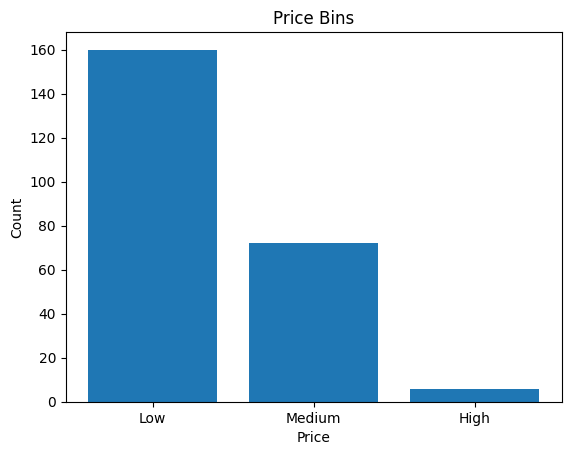

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(group_names, df['Price-binned'].value_counts())

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Bins')

In [26]:
"""Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD".
Then drop the "Screen" attribute from the dataset."""

'Indicator variables\nConvert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD".\nThen drop the "Screen" attribute from the dataset.'

In [30]:
dv1 = pd.get_dummies(df['Screen'])
dv1.rename(columns={'Full HD': 'Screen-Full_HD', 'IPS Panel': 'Screen-IPS_panel'}, inplace=True)
df = pd.concat([df, dv1], axis=1)
df.drop('Screen', axis=1, inplace=True)
df.head()

KeyError: 'Screen'